# Statistical data analysis

## Introduction

I am an analyst at Megaline, a federal mobile operator.

Clients are offered two tariff plans: "Smart" and "Ultra". 

In order to adjust the advertising budget, the commercial department wants to understand which plan brings in the most money.

I have to do a preliminary analysis of the tariffs on a small sample of customers. 

I have data of 500 users of Megaline: who they are, where they come from, what tariff they use, and how many calls and messages each sent in 2018. 

I need to analyze customer behavior and draw a conclusion about which tariff is better.

## Importing the necessary libraries and loading data

Let's create a cell for the necessary libraries.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

Let's open the file `calls.csv` and save the dataframe to a variable `calls`.

In [2]:
calls = pd.read_csv('C:/Users/m.v.kuznetsov/Downloads/calls.csv')

Displaying the first 5 lines of the dataframe `calls`.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Displaying basic information for the dataframe `calls`.

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Let's make a histogram for the column with the duration of calls.

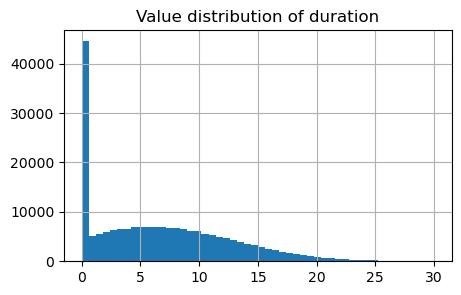

In [47]:
calls['duration'].hist(range=(0, 30), bins=50, figsize=(5,3))
plt.title('Value distribution of duration')
plt.show()

We see that the distribution is not uniform. Most of the calls have a duration of less than 1 minute.

Let's open the file `internet.csv` and save the dataframe as a variable `sessions`.

In [23]:
sessions = pd.read_csv('C:/Users/m.v.kuznetsov/Downloads/internet.csv')

Let's display the first 5 lines of dataframe `sessions`.

In [24]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Let's display the basic information for dataframe `sessions`.

In [25]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Let's display a histogram for the column with the number of megabytes spent.

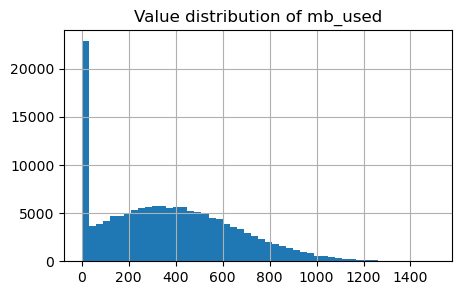

In [45]:
sessions['mb_used'].hist(range=(0, 1500), bins = 50, figsize=(5,3))
plt.title('Value distribution of mb_used')
plt.show()

We see that the distribution is similar to the previous one. There is a peak around zero. It looks like a lot of users did not use the Internet.

Let's open the file `messages.csv` and save the dataframe as a variable `messages`.

In [48]:
messages = pd.read_csv('C:/Users/m.v.kuznetsov/Downloads/messages.csv')

Let's print the first 5 lines of the dataframe `messages`.

In [49]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Let's display the basic information for the dataframe `messages`.

In [50]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Open the `tariffs.csv` file and save the dataframe as a variable `tariffs`.

In [51]:
tariffs = pd.read_csv('C:/Users/m.v.kuznetsov/Downloads/tariffs.csv')

Let's display the entire dataframe `tariffs`.

In [52]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Let's display the basic information for the dataframe `tariffs`.

In [53]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Let's open the file `users.csv` and save the dataframe as a variable `users`.

In [55]:
users = pd.read_csv('C:/Users/m.v.kuznetsov/Downloads/users.csv')

Let's print the first 5 lines of the dataframe `users`.

In [20]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Let's display the basic information for the dataframe `users`.

In [56]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Data preprocessing

Let's change the format of the data to `to_datetime()`.

In [57]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d') 

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format = '%Y-%m-%d')

There are calls with zero duration in the data. This is not an error: zeros indicate missed calls, so there is no need to delete them.

However, in the `duration` column of the `calls` dataframe the values are fractional. Let's round up the values of the `duration` column.

In [59]:
calls['duration'] =  np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')

Let's remove column `Unnamed: 0` from dataframe `sessions`. A column with this name occurs when data is saved with an index (`df.to_csv(..., index=column)`). It is not needed now.

In [60]:
del sessions['Unnamed: 0']

Let's create a `month` column in the `calls` dataframe with the month number from the `call_date` column.

In [61]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Let's create a `month` column in the `messages` dataframe with the month number from the `message_date` column.

In [62]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

Let's create a `month` column in the `sessions` dataframe with the month number from the `session_date` column.

In [63]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

Let's calculate the number of calls made for each user by month.

In [64]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [65]:
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Let's calculate the number of used minutes of conversation for each user by month and save it to the variable `minutes_per_month`. 

Let's print the first 30 lines of `minutes_per_month`.

In [66]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [67]:
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Let's count the number of messages sent per month for each user and save it to the variable `messages_per_month`. 

Let's print the first 30 lines of `messages_per_month`.

In [68]:
messages_per_month =  messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [69]:
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Let's count the number of megabytes spent per month for each user and save it to the `sessions_per_month` variable.

Let's print the first 30 lines of `sessions_per_month`.

In [70]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [71]:
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## Data analysis and revenue calculation

Let's combine all the values calculated above into one dataframe `user_behavior`.
For each user-month pair information about tariff, number of calls, messages, and spent megabytes will be available.

In [72]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of clients from the dataset terminated the contract.

In [73]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's check the missing data in the `user_behavior` table after merging:

In [74]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Let's fill in the missing data:

In [75]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Joining information about tariffs.

In [76]:
# renaming the column 'tariff_name'  to a simpler 'tariff'

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [77]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Let's count the number of minutes of calls, messages, and megabytes in excess of those included in the tariff.

In [78]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Convert the megabytes exceeding the tariff into gigabytes and save in the `paid_gb` column.

In [79]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Calculating the revenue for calls, messages and the Internet

In [80]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Calculating the monthly revenue from each user, it will be saved in the `total_cost` column.

In [82]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

The dataframe `stats_df` for each month-tariff pair will store the main characteristics.

In [83]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Let's look at the distribution of the average number of calls by type of tariff and month.

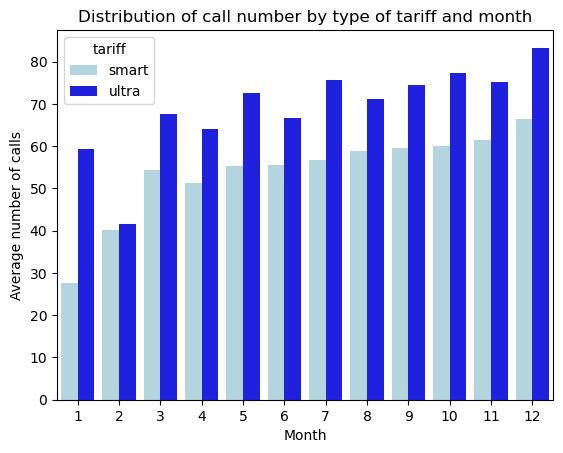

In [85]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of call number by type of tariff and month')
ax.set(xlabel='Month', ylabel='Average number of calls');

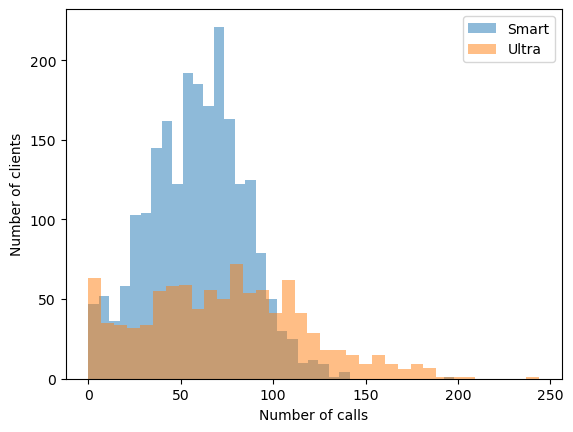

In [86]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of clients')
plt.show()

Distribution of the average duration of calls by tariff types and months.

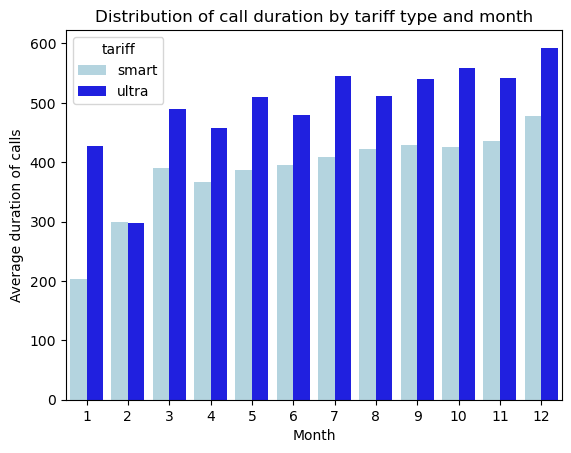

In [87]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of call duration by tariff type and month')
ax.set(xlabel='Month', ylabel='Average duration of calls');

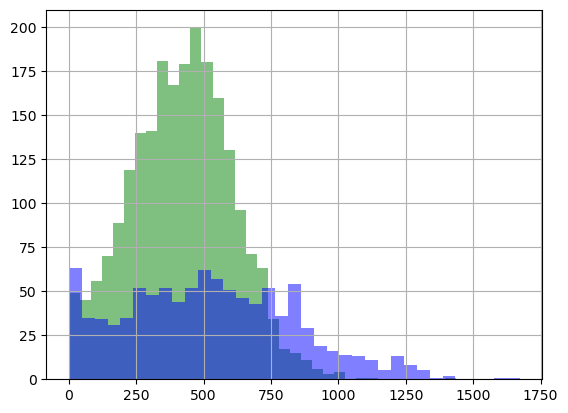

In [89]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.show()

Ultra tariff subscribers have a longer average duration of calls than Smart tariff subscribers. During the year, both tariff users increase the average duration of their calls. Smart subscribers' average call duration increases evenly throughout the year. Ultra tariff users do not show such linear stability. It is worth noting that subscribers of both tariff plans had the lowest indicators in February.

Distribution of the average number of messages by tariff types and months.

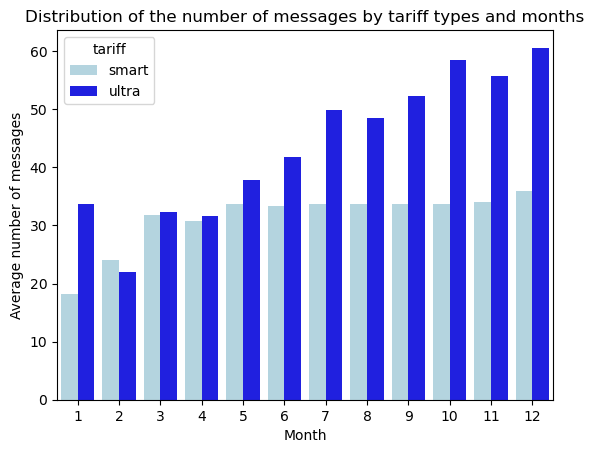

In [90]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the number of messages by tariff types and months')
ax.set(xlabel='Month', ylabel='Average number of messages');

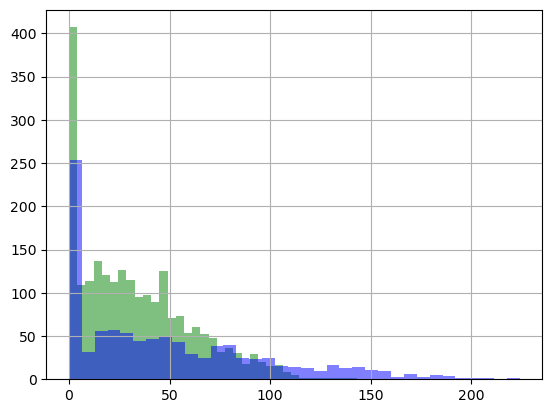

In [91]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')
plt.show()

On average, Ultra tariff users send more messages, almost 20 messages more than Smart tariff users. The number of messages for both tariffs is growing throughout the year. The dynamics of messaging are similar to the trends in the duration of calls: in February the lowest number of messages for the year was recorded, and Ultra tariff users also show a non-linear positive trend.

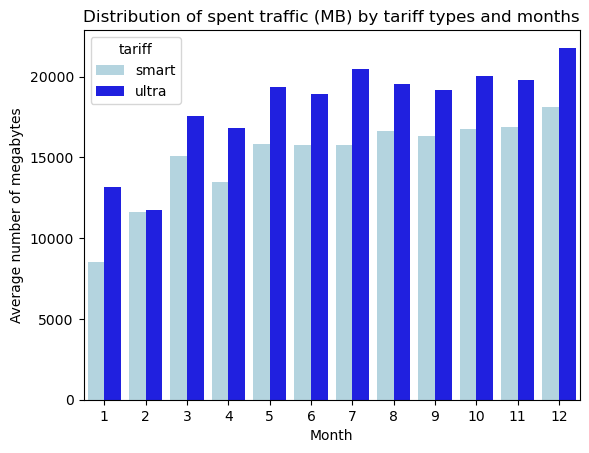

In [92]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of spent traffic (MB) by tariff types and months')
ax.set(xlabel='Month', ylabel='Average number of megabytes');

Comparison of spent megabytes among Smart and Ultra tariff users.

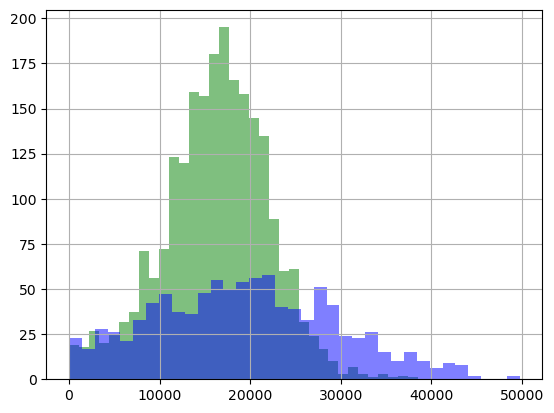

In [93]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')
plt.show()

Users used the Internet the least in January, February, and April. Smart subscribers most often spent 15-17 GB, while Ultra subscribers spent 19-21 GB.

## Hypothesis testing

We will use the t-test to test the hypotheses.

Hypothesis testing: the average revenue of Ultra and Smart tariff users are different.

```
H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users`
H_a: Revenue (total_cost) of Ultra users ≠ revenue (total_cost) of Smart users`
alpha = 0.05
```

In [95]:
results = st.ttest_ind(
    user_behavior[user_behavior['tariff'] =='ultra']['total_cost'], 
    user_behavior[user_behavior['tariff'] =='smart']['total_cost'], equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

4.2606313931076085e-250
Rejecting the null hypothesis


Hypothesis testing: users from Moscow generate more revenue than users from other cities.

```
H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow`
H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow`
alpha = 0.05
```

In [96]:
results = st.ttest_ind(
    user_behavior[user_behavior['city'] =='Москва']['total_cost'], 
    user_behavior[user_behavior['city'] !='Москва']['total_cost'], equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

0.5257376663729298
It was not possible to reject the null hypothesis


## Conclusion

The research was carried out on the "Smart" and "Ultra" tariffs offered by the "Megaline" mobile operator. The analysis was based on the available raw data on tariffs, on users, on calls, on messages, and on Internet sessions. 

In the first stage, the data was preprocessed. It included changing the type of data, error correction, and calculation of additional indicators. There were no significant errors in the data. 

Data on users was also prepared: 
- about the calls and minutes of conversation;
- about the number of messages;
- about the amount of used Internet traffic;
- the monthly revenue of the company coming from each of the users was calculated.

The comparison of tariffs revealed that from January to December for both tariffs there was an increase in the duration of the call, the number of messages, and Internet traffic. At the same time, the duration of calls, the number of messages, and Internet traffic on the Ultra tariff exceeded the same indicator on the Smart tariff. The Ultra tariff is characterized by higher mean and median values for all studied features.

Furthermore, t-tests were performed. It was found that the average revenue of Ultra and Smart tariff users is different, while the average revenue of users from Moscow does not differ from users from other regions.

I would recommend that the commercial department of the company pay attention to the Ultra tariff when developing the advertising budget. In general, it brings in more revenue.